<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv("/content/drive/My Drive/classification/incalss day2/Iris.csv")

In [0]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data=data.drop(["SepalLengthCm","SepalWidthCm","Id"],axis=1)

In [0]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


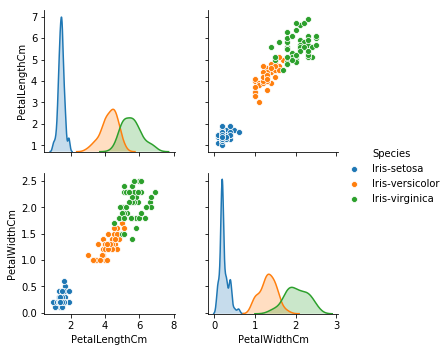

In [0]:
sns.pairplot(data,hue="Species")

In [0]:
data["PetalLengthCm"].describe

<bound method NDFrame.describe of 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
5      1.7
6      1.4
7      1.5
8      1.4
9      1.5
10     1.5
11     1.6
12     1.4
13     1.1
14     1.2
15     1.5
16     1.3
17     1.4
18     1.7
19     1.5
20     1.7
21     1.5
22     1.0
23     1.7
24     1.9
25     1.6
26     1.6
27     1.5
28     1.4
29     1.6
      ... 
120    5.7
121    4.9
122    6.7
123    4.9
124    5.7
125    6.0
126    4.8
127    4.9
128    5.6
129    5.8
130    6.1
131    6.4
132    5.6
133    5.1
134    5.6
135    6.1
136    5.6
137    5.5
138    4.8
139    5.4
140    5.6
141    5.1
142    5.1
143    5.9
144    5.7
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64>

In [0]:
data.describe()


,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [0]:
def my_gpdf(x,mean,sd):
  exponent=np.exp(-(x-mean)**2/(2*sd**2))
  return (1/(np.sqrt(2*np.pi)*sd))*exponent

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(data.iloc[:,:-1])

In [0]:
Xs=pd.DataFrame(X)
Xs.columns=["x1","x2"]
Xs.head()

,x1,x2
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [0]:
Xs["labels"]=data["Species"]
data_setso=Xs[Xs["labels"]=="Iris-setosa"]
data_ver=Xs[Xs["labels"]=="Iris-versicolor"]
data_vir=Xs[Xs["labels"]=="Iris-virginica"]

In [0]:
data_setso.describe()

,x1,x2
count,50.000000,50.000000
mean,-1.304878,-1.255129
std,0.098668,0.140952
min,-1.568735,-1.444450
25%,-1.341272,-1.312977
50%,-1.284407,-1.312977
75%,-1.241757,-1.181504
max,-1.056944,-0.787085


In [0]:
data_ver.describe()

,x1,x2
count,50.000000,50.000000
mean,0.285087,0.167409
std,0.267218,0.259991
min,-0.431421,-0.261193
25%,0.137236,0.001753
50%,0.336266,0.133226
75%,0.478430,0.396172
max,0.762759,0.790591


In [0]:
data_vir.describe()

,x1,x2
count,50.000000,50.000000
mean,1.019792,1.087720
std,0.313839,0.361091
min,0.421564,0.264699
25%,0.762759,0.790591
50%,1.018654,1.053537
75%,1.203468,1.447956
max,1.786341,1.710902


In [0]:
test1=[0.53529,0.5276]
test2=[-1.398,-1.3129]
test3=[1.047,1.185]
p_seto=my_gpdf(test3[0],-1.304878,0.098668)*my_gpdf(test3[1],	-1.255129,0.140952)*(1/3)
p_ver=my_gpdf(test3[0],0.285087,0.267218)*my_gpdf(test3[1],	0.167409,0.259991)*(1/3)
p_vir=my_gpdf(test3[0],1.019792,0.313839)*my_gpdf(test3[1],	1.087720,0.361091)*(1/3)
print(p_seto,p_ver,p_vir)
print(np.argmax([p_seto,p_ver,p_vir]))

1.339097437936306e-188 6.180715843510243e-06 0.4497620614333546
2


In [0]:
p_seto=my_gpdf(test2[0],-1.304878,0.098668)*my_gpdf(test2[1],	-1.255129,0.140952)*(1/3)
p_ver=my_gpdf(test2[0],0.285087,0.267218)*my_gpdf(test2[1],	0.167409,0.259991)*(1/3)
p_vir=my_gpdf(test2[0],1.019792,0.313839)*my_gpdf(test2[1],	1.087720,0.361091)*(1/3)
print(p_seto,p_ver,p_vir)
print(np.argmax([p_seto,p_ver,p_vir]))

2.246731057137385 1.6933491560269706e-16 1.530640926146968e-23
0


In [0]:
p_seto=my_gpdf(test1[0],-1.304878,0.098668)*my_gpdf(test1[1],	-1.255129,0.140952)*(1/3)
p_ver=my_gpdf(test1[0],0.285087,0.267218)*my_gpdf(test1[1],	0.167409,0.259991)*(1/3)
p_vir=my_gpdf(test1[0],1.019792,0.313839)*my_gpdf(test1[1],	1.087720,0.361091)*(1/3)
print(p_seto,p_ver,p_vir)
print(np.argmax([p_seto,p_ver,p_vir]))

2.0688834290990328e-110 0.18867921332661355 0.04269270981555688
1
